[*********************100%***********************]  1 of 1 completed


Mean Absolute Error: 36.01


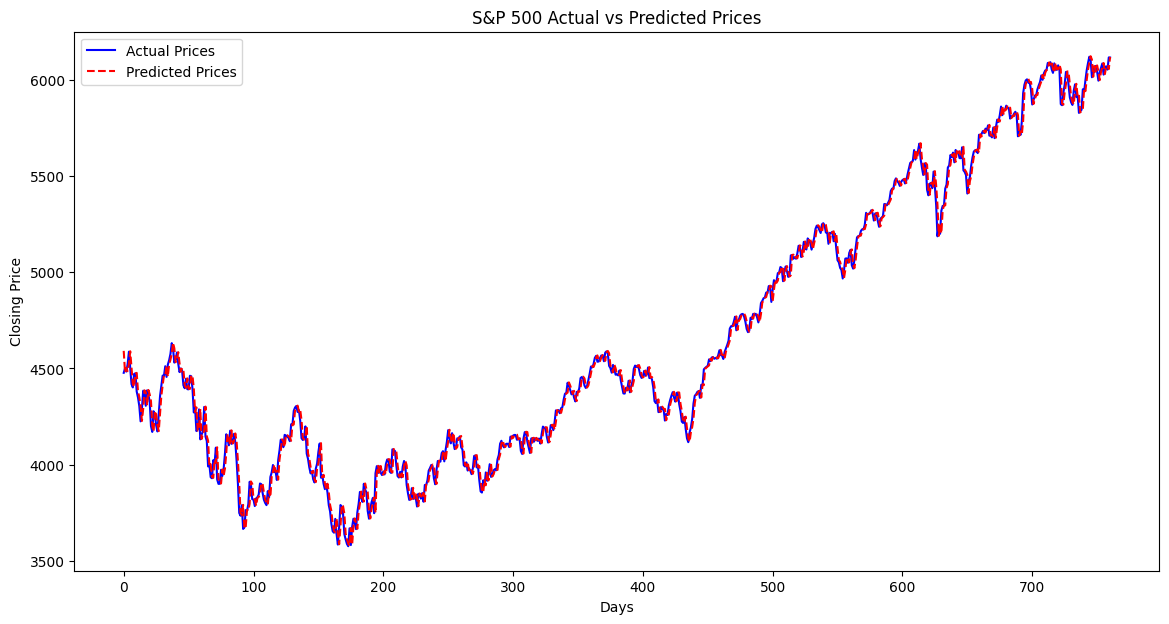

Predicted Closing Price for the Next Day: 6117.72


In [1]:
!pip install yfinance scikit-learn matplotlib pandas

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ticker = "^GSPC"
df = yf.download(ticker, start="2010-01-01", end="2025-02-17")

df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Close']].values
y = df['Next_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

plt.figure(figsize=(14,7))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.legend()
plt.title("S&P 500 Actual vs Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.show()

latest_price = df[['Close']].values[-1].reshape(1, -1)
next_day_price = model.predict(latest_price)[0]
print(f"Predicted Closing Price for the Next Day: {next_day_price:.2f}")
